## Clustering
source: Wikipedia

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

https://en.wikipedia.org/wiki/Cluster_analysis

Clustering can be used to group all the shopping items available on the web into a set of unique products.   

Market researchers use cluster analysis to partition the general population of consumers into market segments and to better understand the relationships between different groups of consumers/potential customers, and for use in market segmentation, product positioning, new product development and selecting test markets.  

In the study of social networks, clustering may be used to recognize communities within large groups of people.
Recommender systems are designed to recommend new items based on a user's tastes. They sometimes use clustering algorithms to predict a user's preferences based on the preferences of other users in the user's cluster. ie. Netflix telling you what to watch, providing % match for new shows/movies.  

Analyists use poll data in cluster analysis to discern typologies of opinions, habits, and demographics that may be useful in politics and marketing.  


#### Unsupervised Learning
Clustering is an unsupervised learning model. We are not providing the expected outcomes. We want to know about the data without imposing labels in the model.

In [ ]:
# This is normally where you'd type the code to install the packages required.

# !pip install sklearn
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

We are using several modules. 

>`import numpy as np`  
>`import seaborn as sns`  
>`from sklearn.cluster import KMeans`   
>`import matplotlib.pyplot as plt`


In [1]:
# type the code to import the libraries
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### Our Sample Data
For this tutorial, we are using a dataset available in scikit-learn, the iris dataset. This data is frequently used in machine learning examples. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.  

----

Since the data we are using is in the seaborn datasets, which we already imported, we just need to  assign a name to the dataset.

>`iris = sns.load_dataset("iris")` 

In [2]:
# type the code to load the dataset
iris = sns.load_dataset("iris")

As always, once data is loaded, we want to explore it before we begin working with it. We will explore the first 5 rows, the last 5 rows, determine the number of columns and rows, and summarize the information in each column.

>`iris.head()`  
>`iris.tail()`  
>`iris.shape`   
>`iris.describe()` 

In [3]:
# type the code to display the first 5 rows of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# type the code to display the last 5 rows of data
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
# type the code to display the shape of the data
iris.shape


(150, 5)

In [6]:
# type the code to describe the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This dataset has 4 feature columns, but we will use only 2 for our clustering model. In order to help us decide which pair of features to use, we can use the Seaborn (sns) pairplot to display each set of pairs of features.

>`sns.pairplot(iris, hue="species")`  
>`plt.show()`

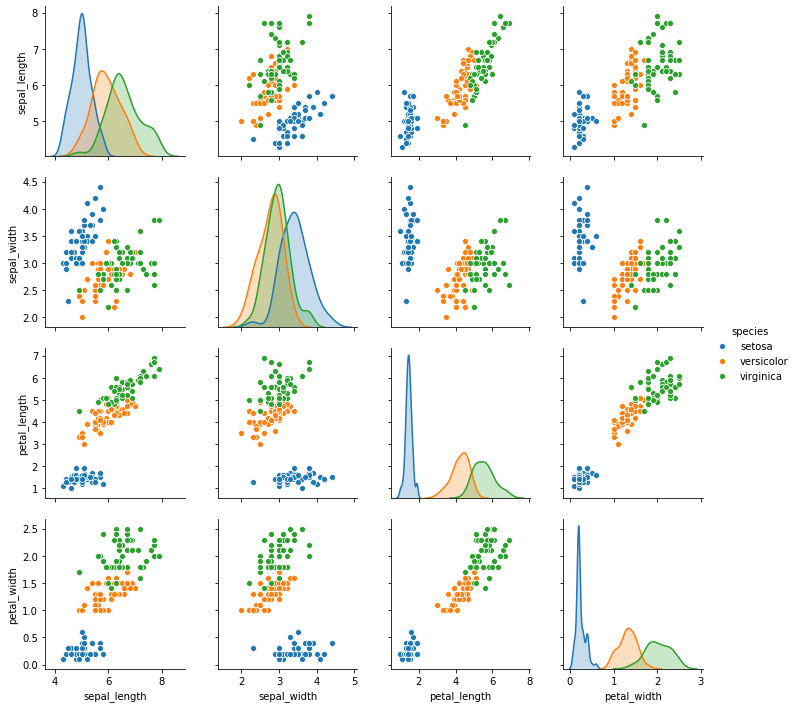

In [7]:
# type the code to display the pair plot
sns.pairplot(iris, hue="species")
plt.show()

Looking at the different plots, we see the Petal Length and Petal Width has some nice clusters. We will use those for our clustering.

We've selected the data to use, so it's time to plot it on a scatter plot to visualize the data. First, we will create variables for the data we want to explore.

>`x1 = np.array(iris["petal_length"])`  
>`x2 = np.array(iris["petal_width"])`  
>`y = np.array(iris["species"])`  

In [8]:
# type the code to create the variables to plot
x1 = np.array(iris["petal_length"])
x2 = np.array(iris["petal_width"])
y = np.array(iris["species"])

We can create a simple scatter plot by passing our variables.

>`sns.scatterplot(x=x1, y=x2)`  
>`plt.show()` 

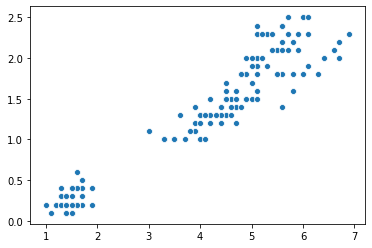

In [9]:
# type the code to plot the data
sns.scatterplot(x=x1, y=x2)
plt.show()

We can also include more code to finesse the plot and better describe what we are plotting.

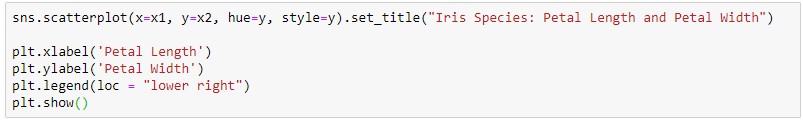

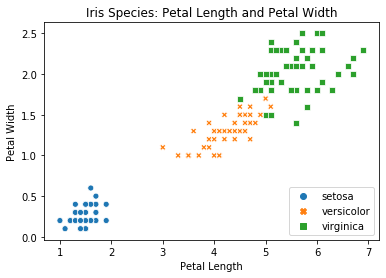

In [10]:
# type the code to finesse the plot
sns.scatterplot(x=x1, y=x2, hue=y, style=y).set_title("Iris Species: Petal Length and Petal Width")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc = "lower right")
plt.show()

#### K-means
K-means is used to group similar data together and discover underlying patterns. K-means will look for a fixed number of clusters in a dataset (represented by _k_).

We can define the number of targets (k), which is the number of centroids we need in the data. This represents the center of a cluster. To find the center of the cluster, it uses the average of the data (also called the "mean"). Each data point is then assigned to a cluster.

In the background, the k-means algorithm starts by randomly selected centroids and will use those as the centerpoint for each cluster cluster. It then performs iterative calculations to optimize the position of the centroids. Once there is no longer change in the values, or a defined number of iterations have been performed, the final clusters are displayed.

We will first create a new iris dataframe with just the Petal Length and Petal Width. We can do this by creating a new variable and dropping the columns from the iris data that we don't want.

>`iris_df = iris.drop(["sepal_width", "sepal_length","species"], axis=1)` 

In [11]:
# type the code to create the iris_df 
iris_df = iris.drop(["sepal_width", "sepal_length", "species"], axis = 1)

We will create the K-means model, specifying 3 clusters.

>`kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_df)`

In [16]:
# type the code to create the K-means model
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_df)

Then we will assign a variable for the centroids.

>`c = kmeans.cluster_centers_` 

In [17]:
# type the code to assign the centroids to c
c = kmean.cluster_centers_

To display the results of the centroids and the clusters for each one, we will use a matplotlib pyplot.

>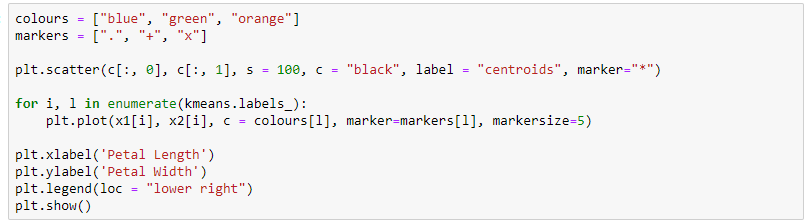


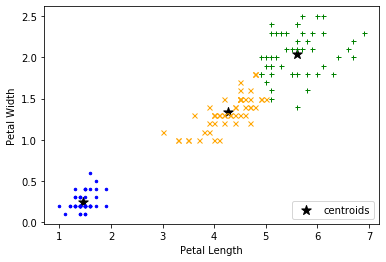

In [18]:
# type the code to display the cluster
colours = ["blue","green", "orange"]
markers = [".", "+", "x"]

plt.scatter(c[:, 0], c[:,1], s = 100, color = "black", label = "centroids", marker = "*")

for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i], x2[i], c = colours[l], marker = markers[l], markersize=5)
    
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc = "lower right")
plt.show()

The model has found the centroids and applied the data points to the nearest centroid. This is not identical to the iris species scatter plot. We can apply the centroids to the plot with the iris species to compare the results.

>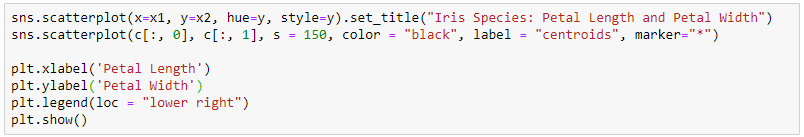

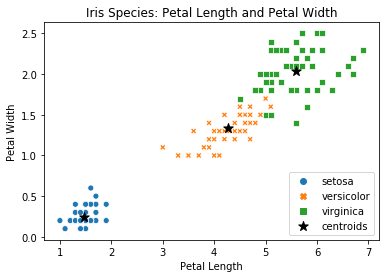

In [19]:
sns.scatterplot(x=x1, y=x2, hue=y, style=y).set_title("Iris Species: Petal Length and Petal Width")
plt.scatter(c[:, 0], c[:,1], s = 100, color = "black", label = "centroids", marker = "*")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc = "lower right")
plt.show()

One cluster is very distinct and is easy to see the centroid and its data points. The other two species have some overlap. Compare the split point for the clusters that overlap to the species scatterplot.

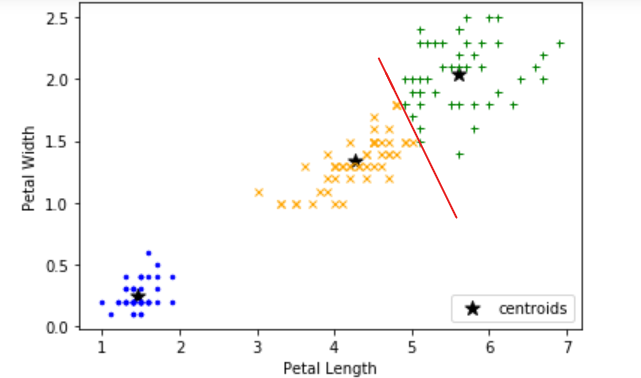

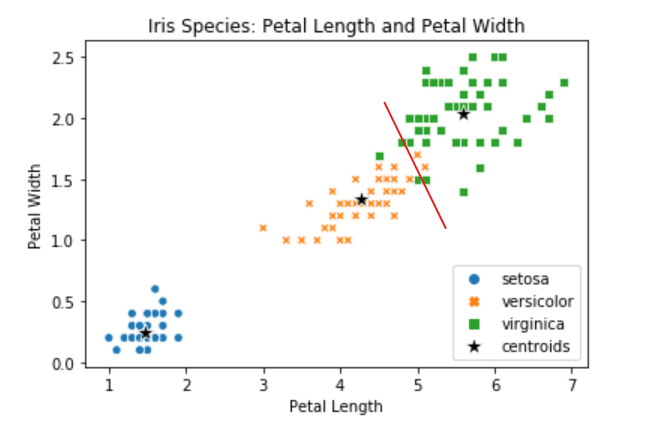

In [2]:
# add a comment to describe the difference between a scatterplot and clustering


Download this completed notebook and upload to the Teams Assignment to mark it as complete. 
#### File > Download as > Notebook (.ipynb)